# Data Science Regression Project: Predicting American Home Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Data Load

In [2]:
df1 = pd.read_csv('American_Housing_Data.csv')
df1.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

**Drop features that are not required to build our model**

In [4]:
df2 = df1.drop(['Zip Code','Address','State','Zip Code Population','Zip Code Density','County','Median Household Income','Latitude','Longitude'],axis=1)
df2.head()

,Price,Beds,Baths,Living Space,City
0,3999000.0,2,3,1967,New York
1,3999000.0,2,3,1967,New York
2,1650000.0,1,1,718,New York
3,760000.0,3,2,1538,New York
4,1100000.0,1,1,600,New York


## Data Cleaning

In [5]:
df2.isnull().sum()

Price           0
Beds            0
Baths           0
Living Space    0
City            0
dtype: int64

In [6]:
df2.describe()

,Price,Beds,Baths,Living Space
count,3.998100e+04,39981.000000,39981.000000,39981.000000
mean,6.227771e+05,3.171682,2.466572,1901.522723
std,9.469793e+05,1.308796,1.323042,1211.307257
min,1.800000e+03,1.000000,1.000000,2.000000
25%,2.650000e+05,3.000000,2.000000,1200.000000
50%,3.999000e+05,3.000000,2.000000,1639.000000
75%,6.749900e+05,4.000000,3.000000,2265.000000
max,3.800000e+07,54.000000,66.000000,74340.000000


In [7]:
df2.dtypes

Price           float64
Beds              int64
Baths             int64
Living Space      int64
City             object
dtype: object

## Feature Engineering

**Add new feature called price per living space**

In [8]:
df3 = df2.copy()
df3['price_per_living_space']=round(df3['Price']/df3['Living Space'],2)
df3.head()

,Price,Beds,Baths,Living Space,City,price_per_living_space
0,3999000.0,2,3,1967,New York,2033.05
1,3999000.0,2,3,1967,New York,2033.05
2,1650000.0,1,1,718,New York,2298.05
3,760000.0,3,2,1538,New York,494.15
4,1100000.0,1,1,600,New York,1833.33


In [9]:
df3.City.unique()

array(['New York', 'Staten Island', 'Bronx', 'Floral Park', 'Glen Oaks',
       'Astoria', 'Sunnyside', 'Long Island City', 'Brooklyn', 'Flushing',
       'College Point', 'Whitestone', 'Bayside', 'Little Neck',
       'Oakland Gardens', 'Fresh Meadows', 'Corona', 'East Elmhurst',
       'Jackson Heights', 'Elmhurst', 'Rego Park', 'Forest Hills',
       'Woodside', 'Maspeth', 'Middle Village', 'Cambria Heights',
       'Springfield Gardens', 'Howard Beach', 'Kew Gardens', 'Ozone Park',
       'South Richmond Hill', 'South Ozone Park', 'Rosedale', 'Hollis',
       'Bellerose', 'Queens Village', 'Jamaica', 'Far Rockaway',
       'Arverne', 'Rockaway Park', 'Philadelphia', 'Washington',
       'Baltimore', 'Towson', 'Gwynn Oak', 'Pikesville', 'Essex',
       'Dundalk', 'Curtis Bay', 'Catonsville', 'Parkville', 'Chesapeake',
       'Virginia Beach', 'Garner', 'Knightdale', 'Wake Forest', 'Raleigh',
       'Durham', 'Huntersville', 'Matthews', 'Charlotte', 'Atlanta',
       'Ponte Vedra', '

In [10]:
len(df3.City.unique())

243

In [11]:
city_stats = df3.groupby('City')['City'].agg('count').sort_values(ascending=False)
city_stats

City
Charlotte              894
Mesa                   894
Las Vegas              892
Denver                 888
Virginia Beach         883
                      ... 
Ozone Park               1
Knightdale               1
South Richmond Hill      1
Kew Gardens              1
Lockbourne               1
Name: City, Length: 243, dtype: int64

## Dimensionality Reduction

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [12]:
city_stats_less_than_10 = city_stats[city_stats<=10]
city_stats_less_than_10

City
Berkeley               10
Redford                10
Reseda                 10
Pacoima                10
Tarzana                10
                       ..
Ozone Park              1
Knightdale              1
South Richmond Hill     1
Kew Gardens             1
Lockbourne              1
Name: City, Length: 143, dtype: int64

In [13]:
df3.City = df3.City.apply(lambda x: 'other' if x in city_stats_less_than_10 else x)
len(df3.City.unique())

101

In [14]:
df3.head()

,Price,Beds,Baths,Living Space,City,price_per_living_space
0,3999000.0,2,3,1967,New York,2033.05
1,3999000.0,2,3,1967,New York,2033.05
2,1650000.0,1,1,718,New York,2298.05
3,760000.0,3,2,1538,New York,494.15
4,1100000.0,1,1,600,New York,1833.33


In [15]:
df3[df3['Living Space']/df3.Beds<200].head()

,Price,Beds,Baths,Living Space,City,price_per_living_space
52,799000.0,4,5,628,Staten Island,1272.29
280,1890000.0,6,5,1100,Brooklyn,1718.18
455,2980000.0,14,8,1705,Flushing,1747.80
749,285000.0,2,3,215,Philadelphia,1325.58
2214,120000.0,11,2,2160,Baltimore,55.56


In [16]:
df3.shape

(39981, 6)

## Outlier Removal Using Business Logic

In [17]:
df4=df3[~(df3['Living Space']/df3.Beds<200)]
df4.shape

(39865, 6)

In [18]:
df4.price_per_living_space.describe()

count    39865.000000
mean       322.020070
std        272.899138
min          0.830000
25%        166.630000
50%        232.860000
75%        377.820000
max       7291.670000
Name: price_per_living_space, dtype: float64

In [19]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subDF in df.groupby('City'):
        m=np.mean(subDF.price_per_living_space)
        st=np.std(subDF.price_per_living_space)
        reduced_DF=subDF[(subDF.price_per_living_space>(m-st))&(subDF.price_per_living_space<=(m+st))]
        df_out=pd.concat([df_out,reduced_DF],ignore_index=True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape

(32242, 6)

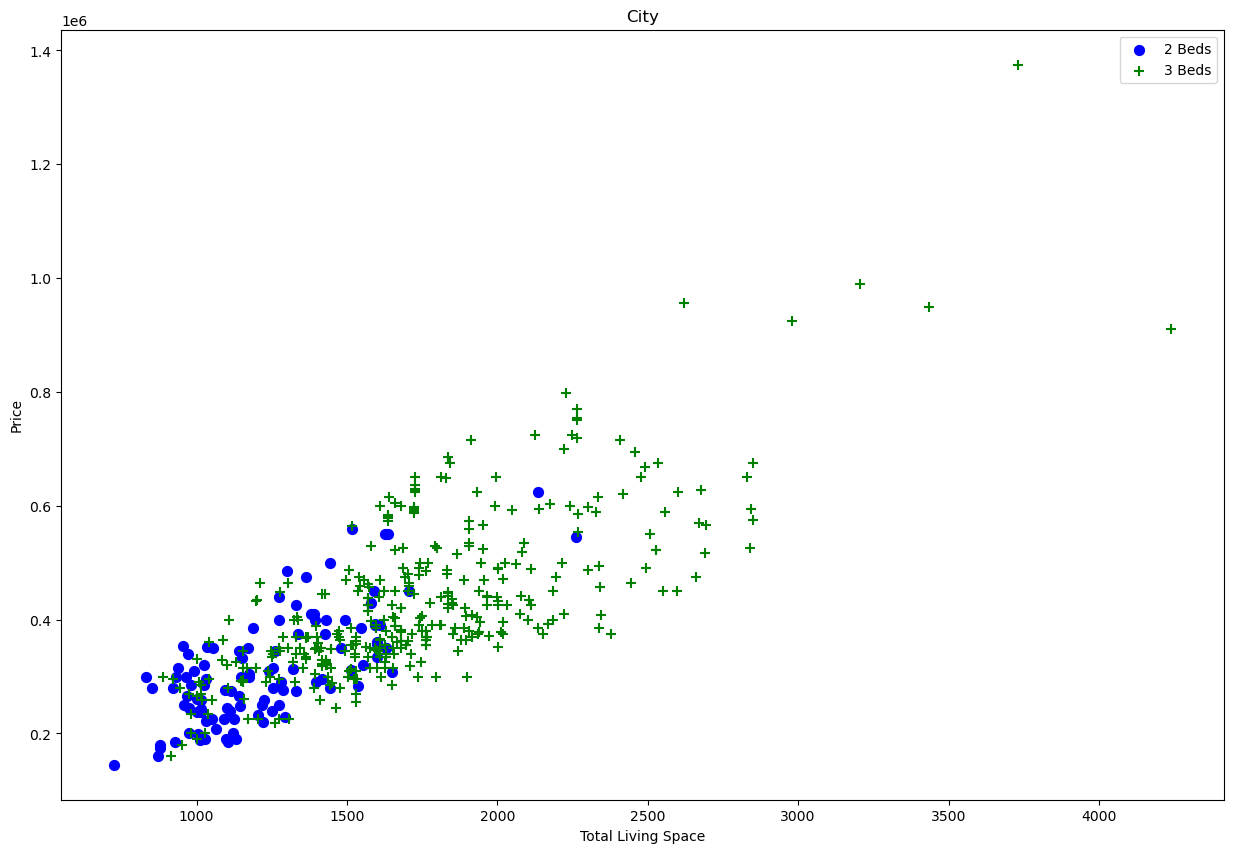

In [20]:
def plot_scatter_chart(df,location):
    Beds_2 = df[(df.City==location) & (df.Beds==2)]
    Beds_3 = df[(df.City==location) & (df.Beds==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(Beds_2['Living Space'],Beds_2.Price,color='blue',label='2 Beds', s=50)
    plt.scatter(Beds_3['Living Space'],Beds_3.Price,marker='+', color='green',label='3 Beds', s=50)
    plt.xlabel("Total Living Space")
    plt.ylabel("Price")
    plt.title('City')
    plt.legend()

plot_scatter_chart(df5,'Charlotte')

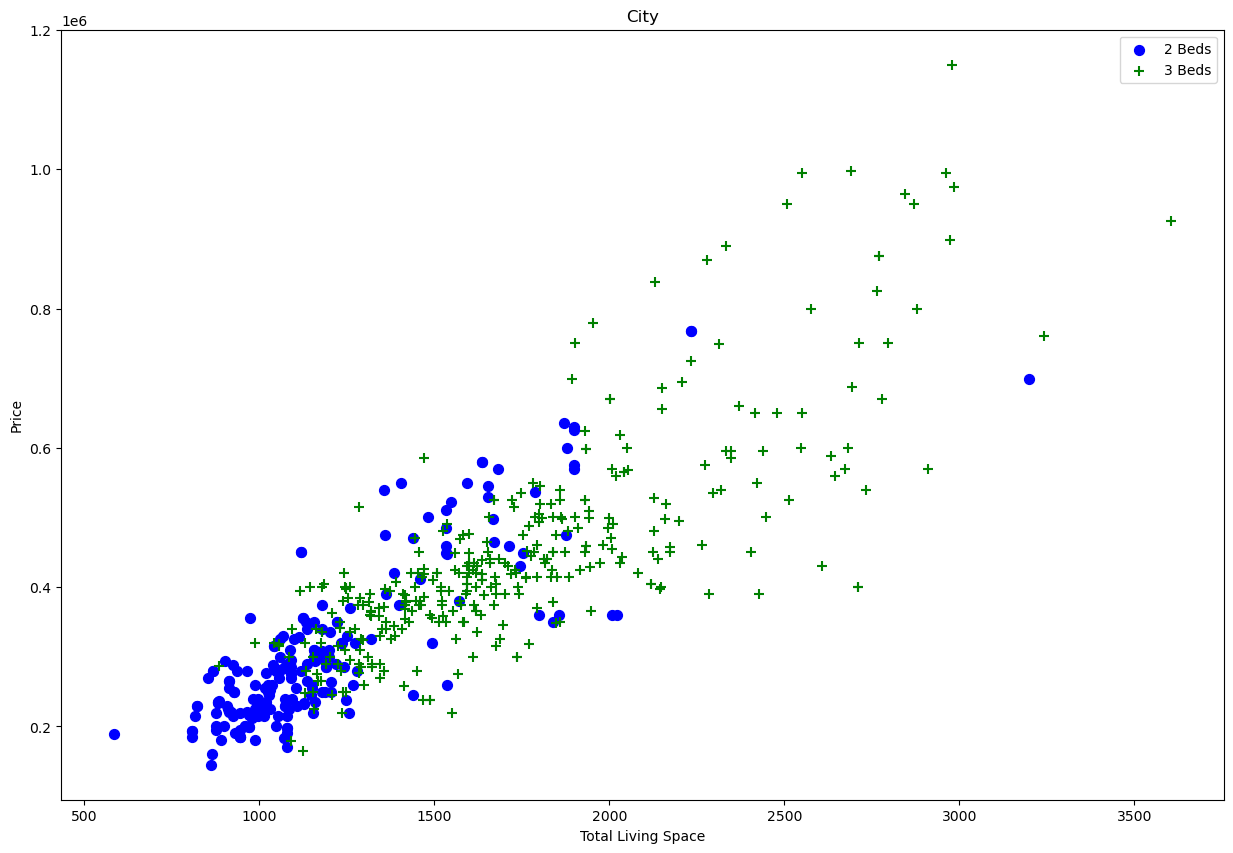

In [21]:
plot_scatter_chart(df5,'Las Vegas')

In [22]:
def remove_beds_outliers(df):
    exclude_indices = np.array([])
    for city, city_df in df.groupby('City'):
        beds_stats = {}
        for beds, beds_df in city_df.groupby('Beds'):
            beds_stats[beds] = {
                'mean': np.mean(beds_df.price_per_living_space),
                'std': np.std(beds_df.price_per_living_space),
                'count': beds_df.shape[0]
            }
        for beds, beds_df in city_df.groupby('Beds'):
            stats = beds_stats.get(beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, beds_df[beds_df.price_per_living_space<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_beds_outliers(df5)

df6.shape

(15480, 6)

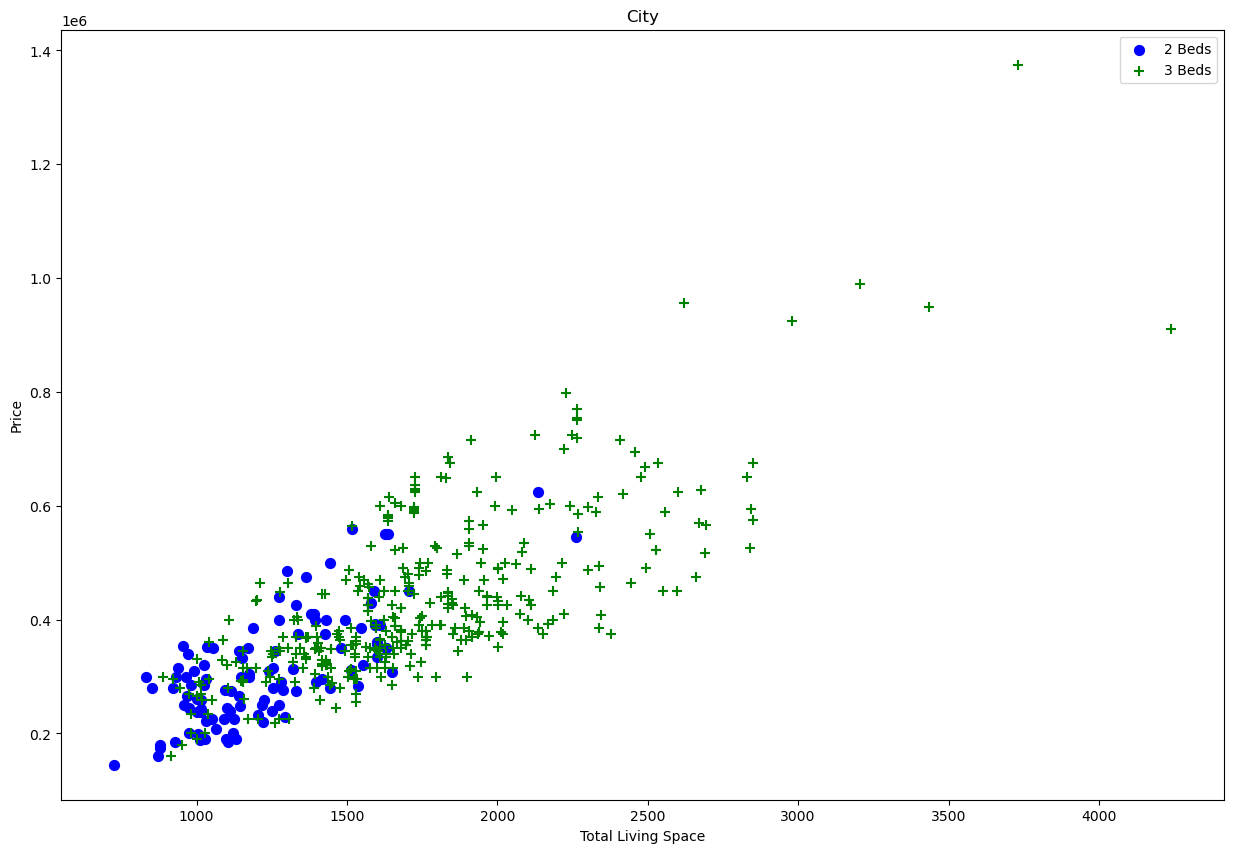

In [23]:
plot_scatter_chart(df5,'Charlotte')

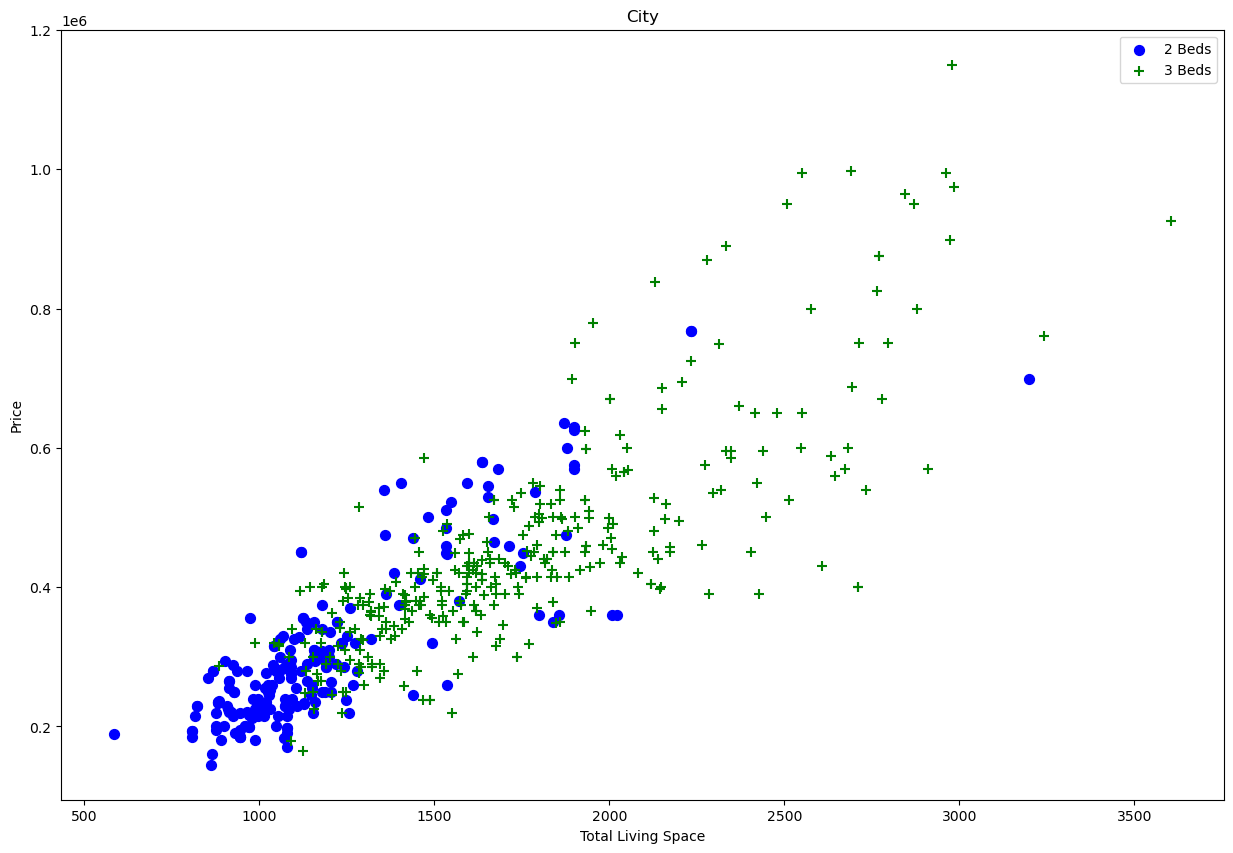

In [24]:
plot_scatter_chart(df5,'Las Vegas')

## Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'Count')

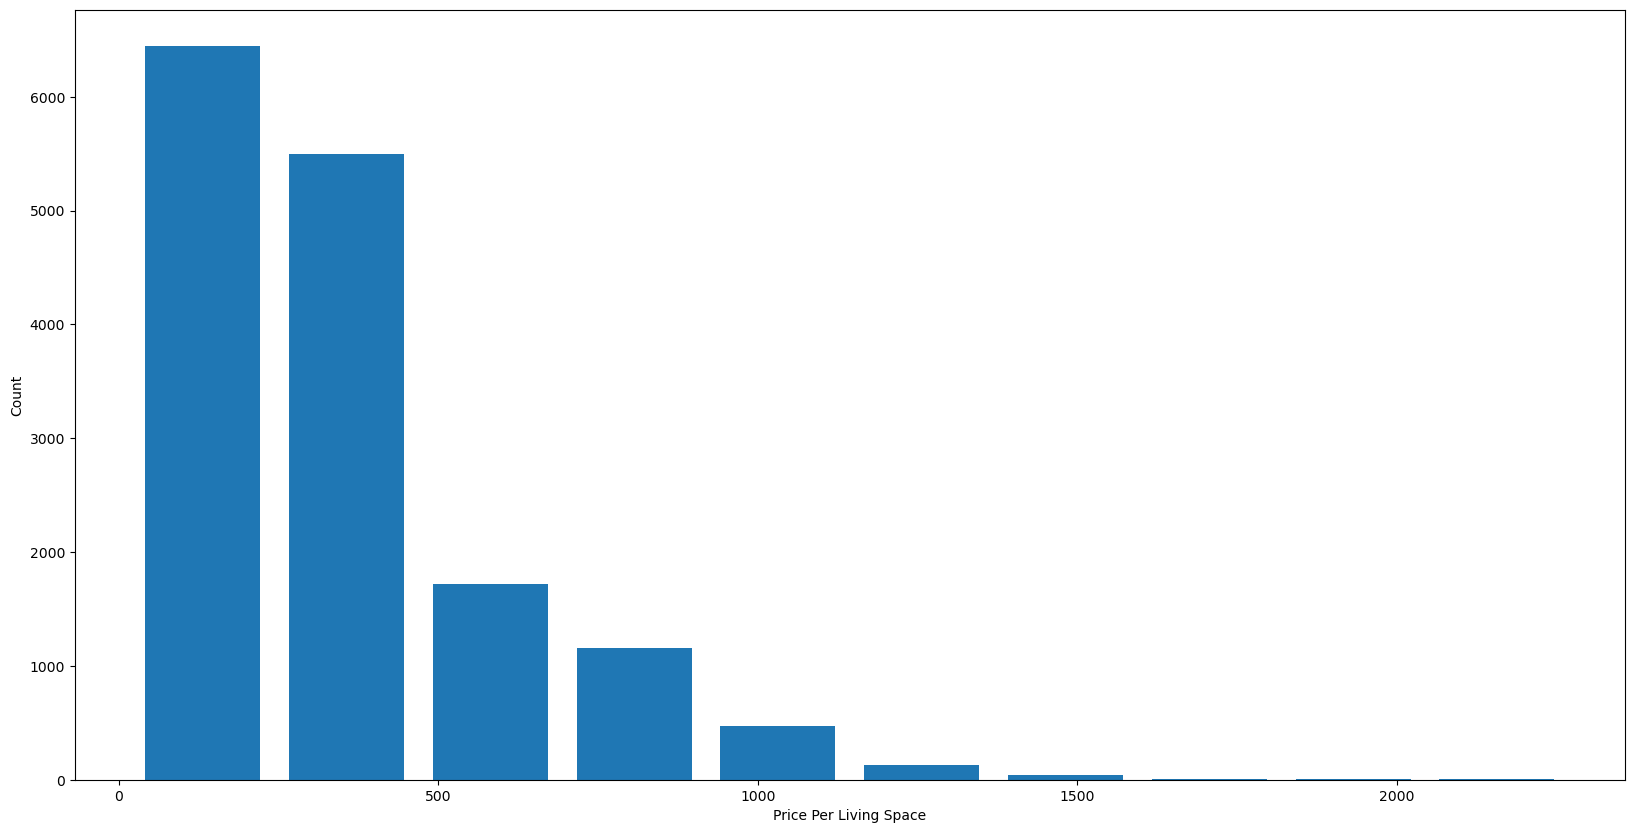

In [25]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_living_space,rwidth=0.8)
plt.xlabel("Price Per Living Space")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

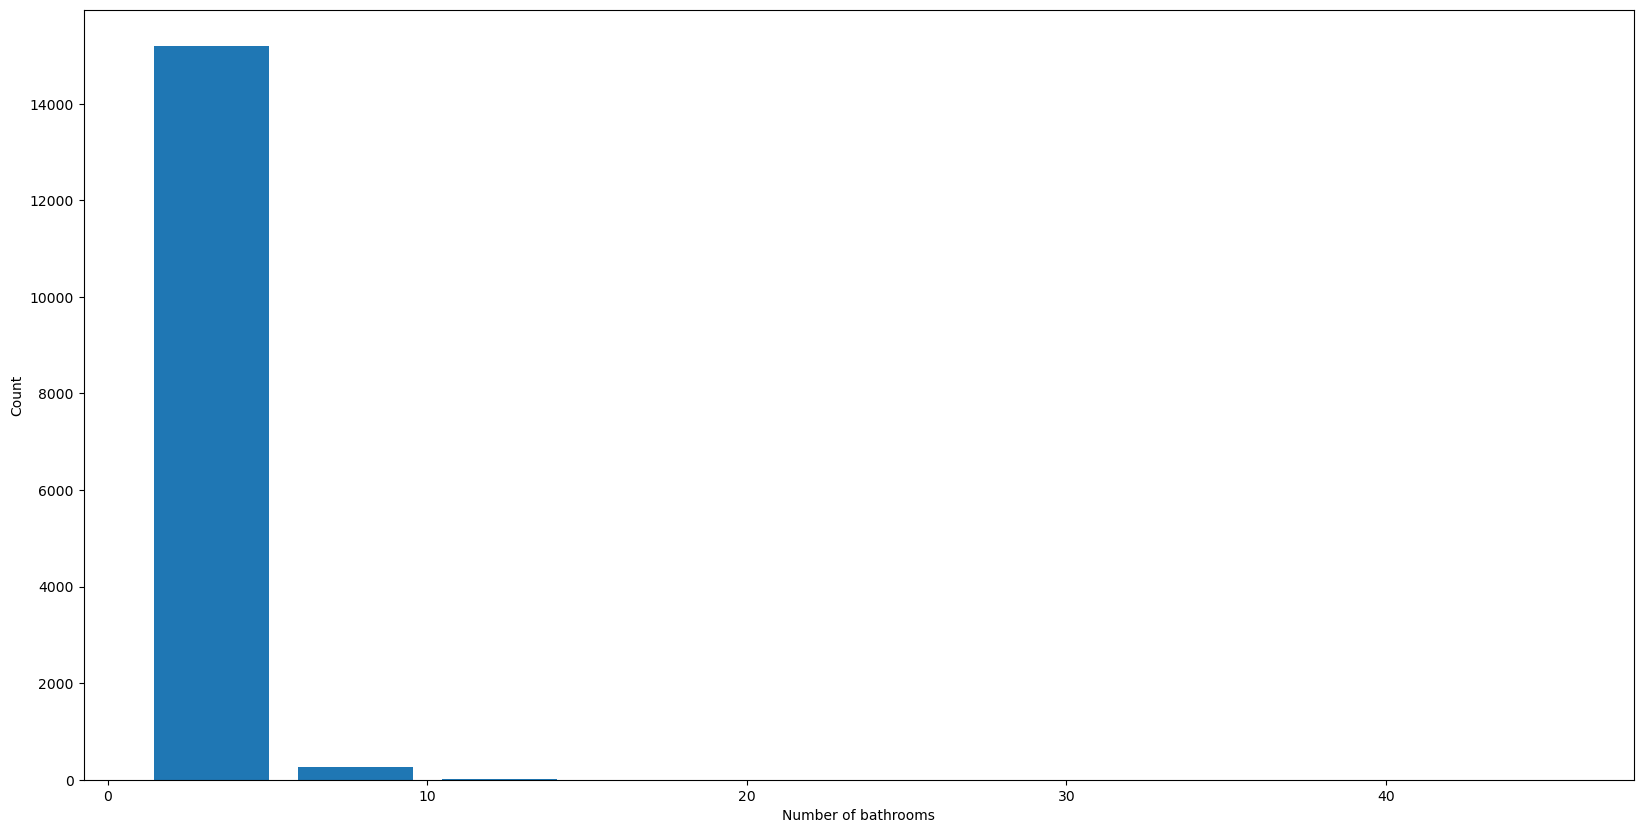

In [26]:
plt.hist(df6.Baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [27]:
df6[df6.Baths>10]

,Price,Beds,Baths,Living Space,City,price_per_living_space
1924,4995000.0,8,11,17390,Atlanta,287.23
1932,4995000.0,8,11,17390,Atlanta,287.23
2761,1800000.0,10,12,10146,Baltimore,177.41
3367,4199000.0,8,11,9682,Brooklyn,433.69
3450,1815000.0,7,12,5328,Canoga Park,340.65
6153,3277025.0,34,20,9536,Dallas,343.65
7536,145000.0,3,21,1194,Detroit,121.44
9584,1755000.0,25,14,9650,Fresno,181.87
9966,5875000.0,44,42,28728,Fresno,204.50
9987,3500000.0,46,46,19768,Fresno,177.05


In [28]:
df6[df6.Baths>df6.Beds+2].head()

,Price,Beds,Baths,Living Space,City,price_per_living_space
1271,3825000.0,4,7,6758,Atlanta,566.00
1300,3825000.0,4,7,6758,Atlanta,566.00
1924,4995000.0,8,11,17390,Atlanta,287.23
1932,4995000.0,8,11,17390,Atlanta,287.23
2288,2495000.0,4,7,6200,Austin,402.42


In [29]:
df7 = df6[df6.Baths<df6.Beds+2]
df7.shape

(15334, 6)

In [30]:
df7 = df7.drop('price_per_living_space',axis=1)

## One Hot Encoding For Location


In [31]:
dummies = pd.get_dummies(df7.City)
dummies.head(3)

,Albuquerque,Apache Junction,Arlington,Atlanta,Austin,Baltimore,Bayside,Beverly Hills,Blacklick,Bronx,...,Tulsa,Van Nuys,Venice,Virginia Beach,Washington,Westerville,Wichita,Woodland Hills,Yukon,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

,Price,Beds,Baths,Living Space,City,Albuquerque,Apache Junction,Arlington,Atlanta,Austin,...,Tucson,Tulsa,Van Nuys,Venice,Virginia Beach,Washington,Westerville,Wichita,Woodland Hills,Yukon
1,285000.0,1,2,1118,Albuquerque,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,479500.0,1,1,2068,Albuquerque,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,279900.0,2,1,1252,Albuquerque,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,868939.0,1,1,4622,Albuquerque,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,559000.0,3,3,2531,Albuquerque,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df9 = df8.drop('City',axis='columns')
df9.head()

,Price,Beds,Baths,Living Space,Albuquerque,Apache Junction,Arlington,Atlanta,Austin,Baltimore,...,Tucson,Tulsa,Van Nuys,Venice,Virginia Beach,Washington,Westerville,Wichita,Woodland Hills,Yukon
1,285000.0,1,2,1118,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,479500.0,1,1,2068,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,279900.0,2,1,1252,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,868939.0,1,1,4622,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,559000.0,3,3,2531,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df9.shape

(15334, 104)

In [35]:
X = df9.drop('Price',axis=1)
X.shape

(15334, 103)

In [36]:
y = df9.Price
y.head()

1    285000.0
2    479500.0
3    279900.0
4    868939.0
5    559000.0
Name: Price, dtype: float64

In [37]:
len(y)

15334

## Split Data

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

len(X_train)

12267

In [39]:
len(X_test)

3067

## Building Model

In [40]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8036358903236449

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80522043, 0.80229202, 0.78558701, 0.76904409, 0.7410968 ])

## Hyperparameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.780648,{'positive': False}
1,lasso,0.780643,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.816870,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [43]:
tree = DecisionTreeRegressor(criterion='friedman_mse',splitter='best')
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.8273985045813189

In [44]:
def predict_price(City, sqft, bath, beds):
  
    if City in X.columns:
        loc_index = np.where(X.columns == City)[0][0]
    else:
        loc_index = -1
    x = np.zeros(len(X.columns))

    x[0] = beds
    x[1] = bath 
    x[2] = sqft 

    if loc_index >= 0:
        x[loc_index] = 1
        
    return tree.predict([x])[0]

In [45]:
predict_price('Austin',1000,2,2)

/home/szymons3234/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


475000.0

In [46]:
predict_price('Omaha',1800,4,2)

/home/szymons3234/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


377225.0

## Export the tested model to a pickle file

In [47]:
import pickle
with open('American_home_prices_model.pickle','wb') as f:
    pickle.dump(tree,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [48]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))